# Emotional VAE Training Notebook

In [1]:
config = {
    "latent_dir": "latent_representations",
    "output_dir": "vae_model",
    "chunk_size": 10,
    "batch_size": 64,
    "epochs": 100,
    "lr": 1e-4,
    "beta": 0.5,
    "max_samples": None
}

# Required Libraries

In [2]:
import json
import os
import utils._modeltraining
from utils._modeltraining import *


%matplotlib inline
warnings.filterwarnings('ignore')

# Training Setup

## Model Configuration

In [ ]:
latent_stats_path = os.path.join(config["latent_dir"], f'latent_stats_{config["chunk_size"]}s.json')
with open(latent_stats_path, 'r') as f:
    latent_stats = json.load(f)

latent_shape = latent_stats['latent_dim']
latent_dim = latent_shape[1]  # 750
print(f"Latent shape: {latent_shape}, Used latent dimension: {latent_dim}")

Latent shape: [8, 750], Kullanılan latent boyutu: 750


## Create the Model

In [ ]:
model = EmotionalVAE(
    latent_dim=latent_dim,
    hidden_dims=[512, 256, 128],
    condition_dim=2
)

## Device Selection

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Kullanılan cihaz: cpu


# Data Loading

## Dataset and DataLoader

In [11]:
dataset = EmotionalLatentDataset(
    latent_dir=config["latent_dir"],
    chunk_size=config["chunk_size"],
    max_samples=config["max_samples"]
)

dataloader = DataLoader(
    dataset,
    batch_size=config["batch_size"],
    shuffle=True,
    num_workers=4
)

Toplam 6976 latent temsil yüklendi.


Latent temsiller yükleniyor:   0%|          | 0/6976 [00:00<?, ?it/s]

# Training Loop

## Initialize the Trainer

In [13]:
trainer = VAETrainer(
    model=model,
    latent_dir=config["latent_dir"],
    output_dir=config["output_dir"],
    chunk_size=config["chunk_size"],
    batch_size=config["batch_size"],
    lr=config["lr"],
    beta=config["beta"],
    device=device
)

Kullanılan cihaz: cpu


### Start Training

In [14]:
training_stats = trainer.train(
    num_epochs=config["epochs"],
    max_samples=config["max_samples"]
)

Toplam 6976 latent temsil yüklendi.


Latent temsiller yükleniyor:   0%|          | 0/6976 [00:00<?, ?it/s]

Epoch 1/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 1/100, Loss: 384151.1720, Reconstruction: 384151.0591, KL: 0.2223


Epoch 2/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 2/100, Loss: 380761.7325, Reconstruction: 380761.5943, KL: 0.2775


Epoch 3/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 3/100, Loss: 377273.3724, Reconstruction: 377273.2162, KL: 0.3209


Epoch 4/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 4/100, Loss: 373597.4068, Reconstruction: 373597.2222, KL: 0.3561


Epoch 5/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 5/100, Loss: 369722.5634, Reconstruction: 369722.3759, KL: 0.3826


Epoch 6/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 6/100, Loss: 365653.7153, Reconstruction: 365653.5224, KL: 0.4014


Epoch 7/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 7/100, Loss: 361379.9300, Reconstruction: 361379.7113, KL: 0.4113


Epoch 8/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 8/100, Loss: 356926.8159, Reconstruction: 356926.5972, KL: 0.4144


Epoch 9/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 9/100, Loss: 352314.4736, Reconstruction: 352314.2549, KL: 0.4125


Epoch 10/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 10/100, Loss: 347548.2457, Reconstruction: 347548.0444, KL: 0.4048


Epoch 11/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 11/100, Loss: 342630.3435, Reconstruction: 342630.1560, KL: 0.3755


Epoch 12/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 12/100, Loss: 337588.1818, Reconstruction: 337588.0255, KL: 0.3344


Epoch 13/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 13/100, Loss: 332438.5874, Reconstruction: 332438.4312, KL: 0.3180


Epoch 14/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 14/100, Loss: 327188.0338, Reconstruction: 327187.8776, KL: 0.3023


Epoch 15/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 15/100, Loss: 321848.7233, Reconstruction: 321848.5722, KL: 0.2867


Epoch 16/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 16/100, Loss: 316431.2317, Reconstruction: 316431.1067, KL: 0.2706


Epoch 17/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 17/100, Loss: 310945.9943, Reconstruction: 310945.8693, KL: 0.2547


Epoch 18/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 18/100, Loss: 305401.9286, Reconstruction: 305401.8036, KL: 0.2397


Epoch 19/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 19/100, Loss: 299807.9596, Reconstruction: 299807.8349, KL: 0.2257


Epoch 20/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 20/100, Loss: 294173.1287, Reconstruction: 294173.0350, KL: 0.2123


Epoch 21/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 21/100, Loss: 288505.2408, Reconstruction: 288505.1471, KL: 0.1986


Epoch 22/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 22/100, Loss: 282813.1362, Reconstruction: 282813.0424, KL: 0.1858


Epoch 23/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 23/100, Loss: 277103.8263, Reconstruction: 277103.7325, KL: 0.1736


Epoch 24/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 24/100, Loss: 271385.4100, Reconstruction: 271385.3162, KL: 0.1618


Epoch 25/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 25/100, Loss: 265665.4028, Reconstruction: 265665.3369, KL: 0.1505


Epoch 26/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 26/100, Loss: 259950.6640, Reconstruction: 259950.5973, KL: 0.1403


Epoch 27/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 27/100, Loss: 254249.0393, Reconstruction: 254248.9768, KL: 0.1303


Epoch 28/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 28/100, Loss: 248567.1808, Reconstruction: 248567.1183, KL: 0.1210


Epoch 29/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 29/100, Loss: 242911.8728, Reconstruction: 242911.8138, KL: 0.1118


Epoch 30/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 30/100, Loss: 237289.7838, Reconstruction: 237289.7370, KL: 0.1031


Epoch 31/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 31/100, Loss: 231707.6937, Reconstruction: 231707.6468, KL: 0.0953


Epoch 32/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 32/100, Loss: 226171.4980, Reconstruction: 226171.4511, KL: 0.0876


Epoch 33/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 33/100, Loss: 220687.2362, Reconstruction: 220687.1918, KL: 0.0804


Epoch 34/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 34/100, Loss: 215261.6002, Reconstruction: 215261.5690, KL: 0.0737


Epoch 35/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 35/100, Loss: 209898.7554, Reconstruction: 209898.7242, KL: 0.0674


Epoch 36/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 36/100, Loss: 204605.9422, Reconstruction: 204605.9110, KL: 0.0615


Epoch 37/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 37/100, Loss: 199387.7157, Reconstruction: 199387.6845, KL: 0.0560


Epoch 38/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 38/100, Loss: 194249.6617, Reconstruction: 194249.6304, KL: 0.0509


Epoch 39/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 39/100, Loss: 189196.5644, Reconstruction: 189196.5450, KL: 0.0462


Epoch 40/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 40/100, Loss: 184233.6689, Reconstruction: 184233.6532, KL: 0.0417


Epoch 41/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 41/100, Loss: 179365.3875, Reconstruction: 179365.3718, KL: 0.0380


Epoch 42/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 42/100, Loss: 174596.3416, Reconstruction: 174596.3260, KL: 0.0342


Epoch 43/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 43/100, Loss: 169930.8508, Reconstruction: 169930.8351, KL: 0.0308


Epoch 44/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 44/100, Loss: 165373.5824, Reconstruction: 165373.5668, KL: 0.0279


Epoch 45/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 45/100, Loss: 160927.2949, Reconstruction: 160927.2792, KL: 0.0252


Epoch 46/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 46/100, Loss: 156597.4293, Reconstruction: 156597.4137, KL: 0.0229


Epoch 47/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 47/100, Loss: 152385.9649, Reconstruction: 152385.9493, KL: 0.0210


Epoch 48/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 48/100, Loss: 148297.2017, Reconstruction: 148297.1861, KL: 0.0197


Epoch 49/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 49/100, Loss: 144334.1864, Reconstruction: 144334.1707, KL: 0.0187


Epoch 50/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 50/100, Loss: 140499.3217, Reconstruction: 140499.3060, KL: 0.0179


Epoch 51/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 51/100, Loss: 136795.6335, Reconstruction: 136795.6178, KL: 0.0175


Epoch 52/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 52/100, Loss: 133225.5457, Reconstruction: 133225.5310, KL: 0.0170


Epoch 53/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 53/100, Loss: 129791.3441, Reconstruction: 129791.3346, KL: 0.0166


Epoch 54/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 54/100, Loss: 126494.5434, Reconstruction: 126494.5356, KL: 0.0159


Epoch 55/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 55/100, Loss: 123336.8265, Reconstruction: 123336.8187, KL: 0.0156


Epoch 56/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 56/100, Loss: 120319.1620, Reconstruction: 120319.1542, KL: 0.0151


Epoch 57/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 57/100, Loss: 117443.2732, Reconstruction: 117443.2654, KL: 0.0144


Epoch 58/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 58/100, Loss: 114708.9607, Reconstruction: 114708.9528, KL: 0.0141


Epoch 59/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 59/100, Loss: 112116.6644, Reconstruction: 112116.6566, KL: 0.0138


Epoch 60/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 60/100, Loss: 109666.1125, Reconstruction: 109666.1047, KL: 0.0132


Epoch 61/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 61/100, Loss: 107356.9986, Reconstruction: 107356.9908, KL: 0.0128


Epoch 62/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 62/100, Loss: 105188.3724, Reconstruction: 105188.3646, KL: 0.0123


Epoch 63/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 63/100, Loss: 103159.0312, Reconstruction: 103159.0234, KL: 0.0121


Epoch 64/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 64/100, Loss: 101267.2770, Reconstruction: 101267.2692, KL: 0.0118


Epoch 65/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 65/100, Loss: 99510.4719, Reconstruction: 99510.4641, KL: 0.0114


Epoch 66/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 66/100, Loss: 97886.1645, Reconstruction: 97886.1567, KL: 0.0110


Epoch 67/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 67/100, Loss: 96391.3811, Reconstruction: 96391.3733, KL: 0.0108


Epoch 68/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 68/100, Loss: 95022.4298, Reconstruction: 95022.4219, KL: 0.0105


Epoch 69/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 69/100, Loss: 93775.6954, Reconstruction: 93775.6876, KL: 0.0102


Epoch 70/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 70/100, Loss: 92645.9743, Reconstruction: 92645.9665, KL: 0.0099


Epoch 71/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 71/100, Loss: 91628.8524, Reconstruction: 91628.8446, KL: 0.0097


Epoch 72/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 72/100, Loss: 90718.8256, Reconstruction: 90718.8178, KL: 0.0096


Epoch 73/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 73/100, Loss: 89910.2768, Reconstruction: 89910.2690, KL: 0.0092


Epoch 74/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 74/100, Loss: 89197.1463, Reconstruction: 89197.1385, KL: 0.0090


Epoch 75/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 75/100, Loss: 88573.0366, Reconstruction: 88573.0288, KL: 0.0088


Epoch 76/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 76/100, Loss: 88031.5855, Reconstruction: 88031.5778, KL: 0.0087


Epoch 77/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 77/100, Loss: 87565.6130, Reconstruction: 87565.6069, KL: 0.0084


Epoch 78/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 78/100, Loss: 87168.9117, Reconstruction: 87168.9062, KL: 0.0082


Epoch 79/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 79/100, Loss: 86834.0234, Reconstruction: 86834.0185, KL: 0.0080


Epoch 80/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 80/100, Loss: 86554.6224, Reconstruction: 86554.6188, KL: 0.0078


Epoch 81/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 81/100, Loss: 86323.9333, Reconstruction: 86323.9298, KL: 0.0084


Epoch 82/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 82/100, Loss: 86148.0841, Reconstruction: 86148.0295, KL: 0.1096


Epoch 83/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 83/100, Loss: 85984.0691, Reconstruction: 85983.9534, KL: 0.2324


Epoch 84/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 84/100, Loss: 85863.2824, Reconstruction: 85863.1760, KL: 0.2130


Epoch 85/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 85/100, Loss: 85768.3193, Reconstruction: 85768.2218, KL: 0.1951


Epoch 86/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 86/100, Loss: 85694.5133, Reconstruction: 85694.4245, KL: 0.1772


Epoch 87/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 87/100, Loss: 85637.9321, Reconstruction: 85637.8524, KL: 0.1585


Epoch 88/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 88/100, Loss: 85595.0247, Reconstruction: 85594.9565, KL: 0.1377


Epoch 89/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 89/100, Loss: 85563.0049, Reconstruction: 85562.9477, KL: 0.1137


Epoch 90/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 90/100, Loss: 85539.3755, Reconstruction: 85539.3324, KL: 0.0863


Epoch 91/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 91/100, Loss: 85522.0948, Reconstruction: 85522.0659, KL: 0.0583


Epoch 92/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 92/100, Loss: 85509.5400, Reconstruction: 85509.5221, KL: 0.0349


Epoch 93/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 93/100, Loss: 85500.6110, Reconstruction: 85500.6018, KL: 0.0194


Epoch 94/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 94/100, Loss: 85494.2633, Reconstruction: 85494.2554, KL: 0.0111


Epoch 95/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 95/100, Loss: 85489.7541, Reconstruction: 85489.7506, KL: 0.0076


Epoch 96/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 96/100, Loss: 85486.5529, Reconstruction: 85486.5529, KL: 0.0065


Epoch 97/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 97/100, Loss: 85484.3463, Reconstruction: 85484.3444, KL: 0.0066


Epoch 98/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 98/100, Loss: 85482.7542, Reconstruction: 85482.7463, KL: 0.0101


Epoch 99/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 99/100, Loss: 85481.6705, Reconstruction: 85481.6679, KL: 0.0075


Epoch 100/100:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 100/100, Loss: 85480.9635, Reconstruction: 85480.9635, KL: 0.0055


# Visualizing Results

## Training Statistics

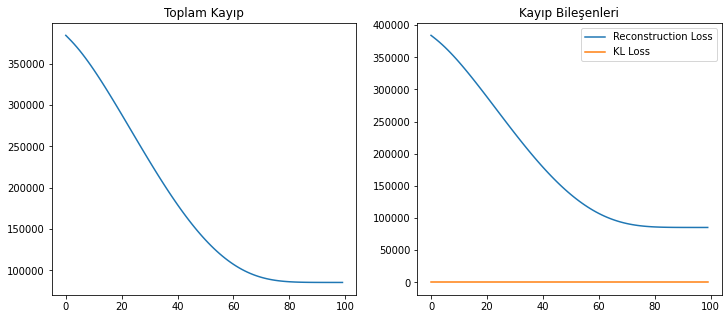

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_stats['total_loss'], label='Total Loss')
plt.title('Total Loss')
plt.subplot(1, 2, 2)
plt.plot(training_stats['recon_loss'], label='Reconstruction Loss')
plt.plot(training_stats['kl_loss'], label='KL Loss')
plt.title('Loss Components')
plt.legend()
plt.show()

# Sample Generation

## Generating Samples with Random Conditions

In [ ]:
generated_samples, conditions = trainer.generate_samples(num_samples=5)

print("Shape of generated samples:", generated_samples.shape)
print("Condition vectors:", conditions)

Üretilen örneklerin şekli: (25, 8, 750)
Koşul vektörleri: [[1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
